In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = '/Users/aleesamann/Desktop/final_project/data/'
FILE_NAME = 'MRegularSeasonDetailedResults.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
regularSeason = pd.read_csv(data_path)

FILE_NAME1 = 'MNCAATourneySeeds.csv'
data_path1 = os.path.join(DATA_DIR, FILE_NAME1)
tourneySeeds = pd.read_csv(data_path1)

FILE_NAME2 = 'MNCAATourneyDetailedResults.csv'
data_path2 = os.path.join(DATA_DIR, FILE_NAME2)
tourneyResults = pd.read_csv(data_path2)

FILE_NAME3 = 'MTeams.csv'
data_path3 = os.path.join(DATA_DIR, FILE_NAME3)
teamNames = pd.read_csv(data_path3)

For the task of this project, we will be using regular season data and tourney seeds to predict the outcome of the 2022 NCAA men's basketball tournaments. The datasets we will use are: 

- <b>teamNames</b>  - this dataset includes information about the names of each team in these datasets and assigns each team a team id number. This is the only document where the team names are written in full. In all other datasets the teams are represented only by their team id number. This is because the team name can only be included as a feature in the model if it has a numeric interpretation. This dataset will be used only at the end of our model building to concatenate with our results for better interpretability.<br><br>
  
- <b>regularSeason</b> - this is a time series dataset that includes information about each team's performance during regular season games. This is a longitudinal document that has game-by-game results starting with the 1985 season for men's teams. For the task of this project, we will only be using data from the 64 teams selected to participate in the 2022 NCAA men's tournament. <br><br>
 
- <b>tourneySeeds</b> - this dataset has information about the tournament seeds which are esentially rankings of each team that will be in the tournament by region. At the end of each regular season, 64 or 68 teams are selected and ranked to be a part of the annual tournament based on their performance during the regular season. These teams are then split up into four regions (which are not necessarily geogrpahically determined) and ranked from 1 to 16 (one being the best) to order the matchups of the tournament. In the first round of the matchups, the No. 1 seed of a region will play against the No. 16 seed of the region. This ordering of matchups is done to award the better teams, while also creating an opportunity for an upset (an unexpected result) of the No. 16 seed beating the No. 1 seed. In this task, we will only be using the tournament seeds for the 2022 season (which are announced prior to the start of the tournament) to add to our dataset and predictor variables. <br><br>
 
- <b>tourneyResults</b>  - this dataset includes information about the outcome of each NCAA annual tournament starting in 2003. For the purposes of this task, we will only be using the tournament results from 2022 as the test set to evaluate our model's performance. <br>
 


# Data Exploration & Preprocessing

I'm going to start with the <b>tourneyResults</b> because we will use the 2022 NCAA tournament results as our test results. This means for our model building, we will only use the teams that were selected in the 2022 NCAA tournament, so i want to drop all other seasons and all other teams that are not relevant to this task. 

### tourneyResults

In [3]:
tourneyResults.shape

(1248, 34)

In [4]:
tourneyResults.dtypes

Season      int64
DayNum      int64
WTeamID     int64
WScore      int64
LTeamID     int64
LScore      int64
WLoc       object
NumOT       int64
WFGM        int64
WFGA        int64
WFGM3       int64
WFGA3       int64
WFTM        int64
WFTA        int64
WOR         int64
WDR         int64
WAst        int64
WTO         int64
WStl        int64
WBlk        int64
WPF         int64
LFGM        int64
LFGA        int64
LFGM3       int64
LFGA3       int64
LFTM        int64
LFTA        int64
LOR         int64
LDR         int64
LAst        int64
LTO         int64
LStl        int64
LBlk        int64
LPF         int64
dtype: object

We can see that all variables, except location, are integers. 

In [5]:
tourneyResults.isna().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [6]:
tourneyResults.Season.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022])

I see here that there are no missing values for any of our variables. Now I want to select only the 2021 tournament games.

In [7]:
tourneyResults = tourneyResults.loc[tourneyResults['Season']== 2021]

In [8]:
tourneyResults.shape

(66, 34)

There are 66 games we will use inr our data set to predict the outcomes of the 2021 NCAA tournament.  We want to build a model that can tell us which team will win each of the different matchups, or games, that were a part of this season. This model could then in effect be used to predict the outcome of future NCAA tournaments. 

### tourneySeeds

In [9]:
tourneySeeds.shape

(2422, 3)

This dataset includes information about 2422 tournament seed rankings.  

In [10]:
tourneySeeds.dtypes

Season     int64
Seed      object
TeamID     int64
dtype: object

Seed is an object type. Later, we will want to change this into an integer so that it can be used in the model. 

In [11]:
tourneySeeds.isna().sum()

Season    0
Seed      0
TeamID    0
dtype: int64

There is no missing information in this dataset

In [12]:
tourneySeeds.Season.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2021, 2022])

For the purposes of this task, we only want to use the rankings from 2022. 

In [13]:
tourneySeeds = tourneySeeds.loc[tourneySeeds['Season']==2021]

In [14]:
tourneySeeds.head()

,Season,Seed,TeamID
2286,2021,W01,1276
2287,2021,W02,1104
2288,2021,W03,1400
2289,2021,W04,1199
2290,2021,W05,1160


In [15]:
tourneySeeds.TeamID.unique()

array([1276, 1104, 1400, 1199, 1160, 1140, 1163, 1261, 1382, 1268, 1277,
       1417, 1207, 1422, 1101, 1233, 1291, 1411, 1211, 1234, 1242, 1438,
       1166, 1425, 1332, 1328, 1281, 1433, 1179, 1455, 1364, 1325, 1186,
       1213, 1111, 1313, 1228, 1222, 1452, 1329, 1397, 1361, 1155, 1260,
       1210, 1353, 1393, 1333, 1251, 1287, 1156, 1180, 1124, 1326, 1116,
       1345, 1437, 1403, 1196, 1314, 1458, 1439, 1429, 1457, 1317, 1159,
       1331, 1216])

In [16]:
tourneySeeds.TeamID.nunique()

68

There are 68 teams that played in the 2021 NCAA tournament. These are the 68 teams for which we will want historical performance metrics to put into our model. From here, we know we want to reduce our datasets to include information only about these 68 teams. 

### regularSeason

In [17]:
regularSeason.shape

(106834, 34)

In the initial dataset, there are 106,834 games, with 34 recorded variables. 

In [18]:
regularSeason.dtypes

Season      int64
DayNum      int64
WTeamID     int64
WScore      int64
LTeamID     int64
LScore      int64
WLoc       object
NumOT       int64
WFGM        int64
WFGA        int64
WFGM3       int64
WFGA3       int64
WFTM        int64
WFTA        int64
WOR         int64
WDR         int64
WAst        int64
WTO         int64
WStl        int64
WBlk        int64
WPF         int64
LFGM        int64
LFGA        int64
LFGM3       int64
LFGA3       int64
LFTM        int64
LFTA        int64
LOR         int64
LDR         int64
LAst        int64
LTO         int64
LStl        int64
LBlk        int64
LPF         int64
dtype: object

In [19]:
regularSeason.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,...,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000,106834.000000
mean,2013.105023,70.738304,1287.903720,75.591198,1282.343262,63.618492,0.068574,26.276728,55.544415,7.261087,...,19.948996,12.050003,17.752607,10.664657,21.685381,11.405442,14.094127,5.997435,2.860288,18.998624
std,5.920959,35.464312,105.084427,11.018139,104.336892,10.859575,0.305636,4.680234,7.486641,3.100561,...,6.030785,5.343250,7.098932,4.229139,4.531194,3.724770,4.380759,2.748476,2.021499,5.427630
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,26.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,40.000000,1199.000000,68.000000,1191.000000,56.000000,0.000000,23.000000,50.000000,5.000000,...,16.000000,8.000000,13.000000,8.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2013.000000,74.000000,1287.000000,75.000000,1281.000000,63.000000,0.000000,26.000000,55.000000,7.000000,...,20.000000,12.000000,17.000000,10.000000,22.000000,11.000000,14.000000,6.000000,3.000000,19.000000
75%,2018.000000,101.000000,1380.000000,83.000000,1373.000000,71.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2023.000000,132.000000,1477.000000,149.000000,1477.000000,144.000000,6.000000,57.000000,103.000000,26.000000,...,59.000000,42.000000,61.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


In [20]:
regularSeason.isna().any()

Season     False
DayNum     False
WTeamID    False
WScore     False
LTeamID    False
LScore     False
WLoc       False
NumOT      False
WFGM       False
WFGA       False
WFGM3      False
WFGA3      False
WFTM       False
WFTA       False
WOR        False
WDR        False
WAst       False
WTO        False
WStl       False
WBlk       False
WPF        False
LFGM       False
LFGA       False
LFGM3      False
LFGA3      False
LFTM       False
LFTA       False
LOR        False
LDR        False
LAst       False
LTO        False
LStl       False
LBlk       False
LPF        False
dtype: bool

In [21]:
team1 = list(regularSeason.WTeamID.unique())
team0 = list(regularSeason.LTeamID.unique())
new = list(team1+team0)
new = pd.DataFrame(new)
new.nunique()

0    368
dtype: int64

There is no missing information in this dataset and 368 unique teams are represented in this dataset. In the next steps, we want to limit the dataset to only the 68 teams that were in the 2021 NCAA tournament.

<AxesSubplot:>

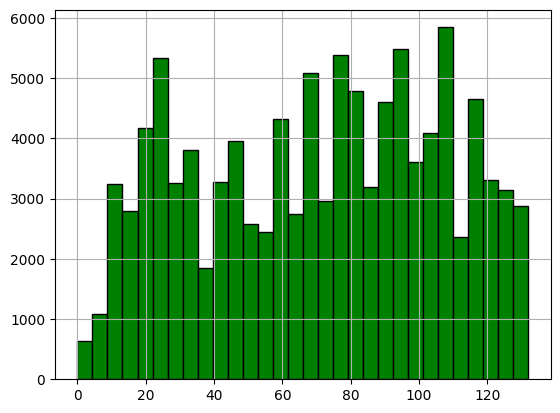

In [22]:
regularSeason['DayNum'].hist(bins=30, facecolor='green',edgecolor='k')

From this histogram, we see that aside from the first 10 days, it seems the distribution of games across the season is fairly consistent with a multimodal distribution. 

In [23]:
winningTeams = pd.DataFrame(regularSeason['WTeamID'].value_counts().head(10).reset_index())
winningTeams = winningTeams.rename(columns={'index':'team_id', 'WTeamID': 'No_of_wins'})
winningTeams = pd.merge(winningTeams, teamNames[['TeamID','TeamName']], left_on='team_id', right_on='TeamID')
winningTeams = winningTeams[['TeamID','TeamName','No_of_wins']]
winningTeams
winningTeams.to_csv('top10.csv')

Across the seasons (2003 - 2023), we see the top 10 teams with the most wins. 

In [24]:
losingTeams = pd.DataFrame(regularSeason['WTeamID'].value_counts().tail(10).reset_index())
losingTeams = losingTeams.rename(columns={'index':'team_id', 'WTeamID': 'No_of_wins'})
losingTeams = pd.merge(losingTeams, teamNames[['TeamID','TeamName']], left_on='team_id', right_on='TeamID')
losingTeams = losingTeams[['TeamID','TeamName','No_of_wins']]
losingTeams

,TeamID,TeamName,No_of_wins
0,1445,W Salem St,26
1,1469,Utah Tech,23
2,1472,St Thomas MN,23
3,1471,UC San Diego,22
4,1474,Queens NC,14
5,1476,Stonehill,13
6,1475,Southern Indiana,12
7,1477,TX A&M Commerce,11
8,1473,Lindenwood,6
9,1289,Morris Brown,4


In [25]:
regularSeason['WTeamID'].value_counts().median()


298.0

Across the seasons (2003 - 2023), we see the 10 teams with the least number of wins. Our expectation is that models would be able to better predict the wins of teams with higher winning counts. 

## teamNames

In [26]:
teamNames

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2023
1,1102,Air Force,1985,2023
2,1103,Akron,1985,2023
3,1104,Alabama,1985,2023
4,1105,Alabama A&M,2000,2023
...,...,...,...,...
372,1473,Lindenwood,2023,2023
373,1474,Queens NC,2023,2023
374,1475,Southern Indiana,2023,2023
375,1476,Stonehill,2023,2023


In [27]:
teamNames.TeamName.nunique()

377

When I first look at the dataset, I see that there are 377 teams (which is not equal to the 368  in the <b>regularSeason</b> dataset). So I want to change the table to only include teams whose last season was in 2003 or later. 

In [28]:
teamNames = teamNames.loc[teamNames['LastD1Season']>=2003]
teamNames

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2023
1,1102,Air Force,1985,2023
2,1103,Akron,1985,2023
3,1104,Alabama,1985,2023
4,1105,Alabama A&M,2000,2023
...,...,...,...,...
372,1473,Lindenwood,2023,2023
373,1474,Queens NC,2023,2023
374,1475,Southern Indiana,2023,2023
375,1476,Stonehill,2023,2023


In [29]:
teamNames.TeamName.nunique()

368

Now I see that there are 368 teams in this list.

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/3009708036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamNames['years_in_d1'] = teamNames['LastD1Season'] - teamNames['FirstD1Season']


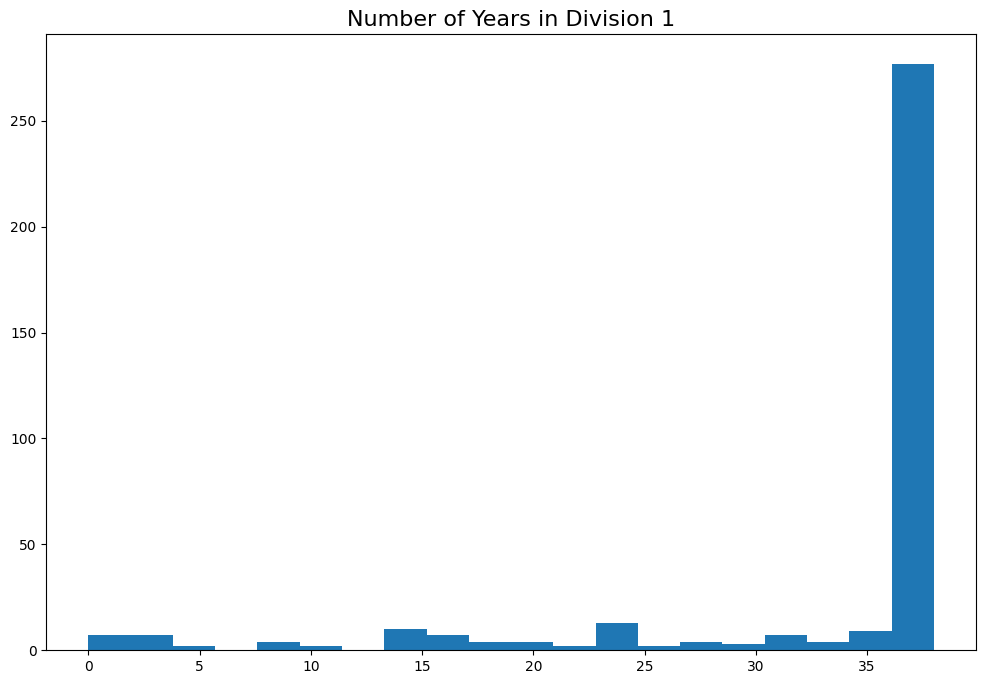

In [30]:
teamNames['years_in_d1'] = teamNames['LastD1Season'] - teamNames['FirstD1Season']

teamNames['years_in_d1'].hist(bins=20, figsize=(12,8))
plt.grid(False)
plt.title('Number of Years in Division 1', fontsize=16)
plt.show()

Here I can see the majority of teams in our dataset have been in the D1 division for over 35 years (counting back to 1985). This means we will have many metrics to use in evaluting their performance over the seasons.

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/3617059627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamNames['is_in'] = 0
/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/3617059627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamNames['is_in'] = 0


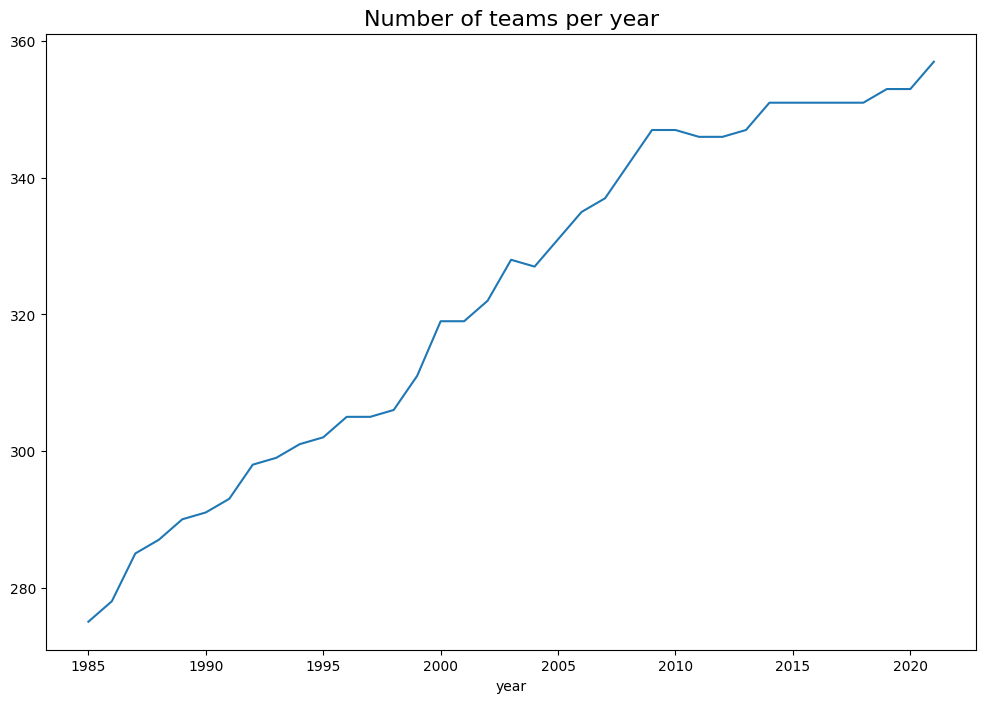

In [31]:
yr_count = pd.DataFrame({'year': np.arange(1985, 2022)})

for year in yr_count.year:
    teamNames['is_in'] = 0
    teamNames.loc[(teamNames.FirstD1Season <= year) & (teamNames.LastD1Season >= year), 'is_in'] = 1
    tot_teams = teamNames.is_in.sum()
    yr_count.loc[yr_count.year == year, 'n_teams'] = tot_teams
    
yr_count = yr_count.set_index('year')
yr_count.n_teams.plot(figsize=(12,8))
plt.title('Number of teams per year', fontsize=16)
plt.show()

Here we can see the number of teams since 1985 has grown by just under 100 teams.

# Feature Engineering

In this step I want to compile the dataframe that I will use to feed into the model. 

In [32]:
regularSeason = regularSeason.loc[regularSeason['Season'] <= 2021]

In this step, I am using only the data from 2002 - 2021 regular season (excluding 2022 and 2023). Because this is timeseries data, and I want to predict the tournament outcome for 2021. I don't want to use any data from after the 2021 regular season in the prediction. 

In [33]:
regularSeason

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,1261,79,N,0,33,76,...,27,9,13,15,26,10,5,6,5,13
96683,2021,132,1159,85,1259,72,H,0,31,59,...,22,9,16,12,19,12,12,2,1,13
96684,2021,132,1222,91,1153,54,N,0,37,66,...,33,10,15,14,17,11,10,2,5,12
96685,2021,132,1228,91,1326,88,N,1,29,64,...,25,22,30,8,27,11,8,7,4,26


In [34]:
regularSeason.DayNum.unique()

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132,  50,  51,  52,   8,   9,   0,   1,   2,   3,   4,
         5,   6,   7])

Because the last 14 days of the regular sesason are regional conference tournaments, I want to keep a variable that indicates if the team played in one of the last 14 days, this would be an indicator of their strength of performance. 

In [35]:
regularSeason['Last14days'] = np.where((regularSeason['DayNum']> 118),1, 0)
#reg_season['WTeam_win14days'] = np.where((reg_season['DayNum']> 118) & (reg_season['T1_score']>reg_season['T2_score']),1, 0)
#reg_season['T2_win14days'] = np.where((reg_season['DayNum']> 118) & (reg_season['T1_score']<reg_season['T2_score']),1, 0)
#reg_season[reg_season['Season'] == 2010]
regularSeason

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Last14days
0,2003,10,1104,68,1328,62,N,0,27,58,...,16,22,10,22,8,18,9,2,20,0
1,2003,10,1272,70,1393,63,N,0,26,62,...,9,20,20,25,7,12,8,6,16,0
2,2003,11,1266,73,1437,61,N,0,24,58,...,14,23,31,22,9,12,2,5,23,0
3,2003,11,1296,56,1457,50,N,0,18,38,...,8,15,17,20,9,19,4,3,23,0
4,2003,11,1400,77,1208,71,N,0,30,61,...,17,27,21,15,12,10,7,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,1261,79,N,0,33,76,...,9,13,15,26,10,5,6,5,13,1
96683,2021,132,1159,85,1259,72,H,0,31,59,...,9,16,12,19,12,12,2,1,13,1
96684,2021,132,1222,91,1153,54,N,0,37,66,...,10,15,14,17,11,10,2,5,12,1
96685,2021,132,1228,91,1326,88,N,1,29,64,...,22,30,8,27,11,8,7,4,26,1


In [36]:
regularSeason

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Last14days
0,2003,10,1104,68,1328,62,N,0,27,58,...,16,22,10,22,8,18,9,2,20,0
1,2003,10,1272,70,1393,63,N,0,26,62,...,9,20,20,25,7,12,8,6,16,0
2,2003,11,1266,73,1437,61,N,0,24,58,...,14,23,31,22,9,12,2,5,23,0
3,2003,11,1296,56,1457,50,N,0,18,38,...,8,15,17,20,9,19,4,3,23,0
4,2003,11,1400,77,1208,71,N,0,30,61,...,17,27,21,15,12,10,7,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,1261,79,N,0,33,76,...,9,13,15,26,10,5,6,5,13,1
96683,2021,132,1159,85,1259,72,H,0,31,59,...,9,16,12,19,12,12,2,1,13,1
96684,2021,132,1222,91,1153,54,N,0,37,66,...,10,15,14,17,11,10,2,5,12,1
96685,2021,132,1228,91,1326,88,N,1,29,64,...,22,30,8,27,11,8,7,4,26,1


#### Dropping teams that aren't in the training set

In [37]:
a = list(tourneySeeds.TeamID.unique())

In this step I created a list of the team ids that were in the 2021 NCAA tournament. This will be used to reduce the number of teams in the dataset. 

In [38]:
regularSeason = regularSeason[regularSeason['WTeamID'].isin(a) | regularSeason['LTeamID'].isin(a)]

In this step, we removed the teams that were not in the 2021 NCAA tournament from the regular season dataset.

In [39]:
regularSeason

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Last14days
0,2003,10,1104,68,1328,62,N,0,27,58,...,16,22,10,22,8,18,9,2,20,0
1,2003,10,1272,70,1393,63,N,0,26,62,...,9,20,20,25,7,12,8,6,16,0
2,2003,11,1266,73,1437,61,N,0,24,58,...,14,23,31,22,9,12,2,5,23,0
3,2003,11,1296,56,1457,50,N,0,18,38,...,8,15,17,20,9,19,4,3,23,0
4,2003,11,1400,77,1208,71,N,0,30,61,...,17,27,21,15,12,10,7,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,1261,79,N,0,33,76,...,9,13,15,26,10,5,6,5,13,1
96683,2021,132,1159,85,1259,72,H,0,31,59,...,9,16,12,19,12,12,2,1,13,1
96684,2021,132,1222,91,1153,54,N,0,37,66,...,10,15,14,17,11,10,2,5,12,1
96685,2021,132,1228,91,1326,88,N,1,29,64,...,22,30,8,27,11,8,7,4,26,1


Now the number of games in the dataset has been redued to 33,503, around one-third of the original dataset. 

#### Converting object variable and creating symmetry in the dataset

Now, I want to convert the 'WLoc' variable into a numeric variable. I will order them H=1, N=2, A=3, since it is more likely for a team to win a home game than an away game. 

In [40]:
W1_loc_labels = {'H': '1',
        'A' : '3',
        'N': '2',
        }
regularSeason['WLoc'] = regularSeason['WLoc'].apply( lambda x : W1_loc_labels[x]) #creating location variable for team 2

 #creating location variable for team 2
#regseason['Loc'] = regseason['WLoc'].astype('category').cat.codes #converting the location variable to numeric

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/1141892018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regularSeason['WLoc'] = regularSeason['WLoc'].apply( lambda x : W1_loc_labels[x]) #creating location variable for team 2


I will also create a 'LLoc' variable to be the inverse of this, and to create symmetry in the dataset. This will be helpful further on. 

In [41]:
regularSeason['LLoc'] = regularSeason['WLoc']
T2_loc_labels = {'1': '3',
        '3' : '1',
        '2': '2',
        }
regularSeason['LLoc'] = regularSeason['LLoc'].apply( lambda x : T2_loc_labels[x])

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/347247167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regularSeason['LLoc'] = regularSeason['WLoc']
/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/347247167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regularSeason['LLoc'] = regularSeason['LLoc'].apply( lambda x : T2_loc_labels[x])


In [42]:
regularSeason

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Last14days,LLoc
0,2003,10,1104,68,1328,62,2,0,27,58,...,22,10,22,8,18,9,2,20,0,2
1,2003,10,1272,70,1393,63,2,0,26,62,...,20,20,25,7,12,8,6,16,0,2
2,2003,11,1266,73,1437,61,2,0,24,58,...,23,31,22,9,12,2,5,23,0,2
3,2003,11,1296,56,1457,50,2,0,18,38,...,15,17,20,9,19,4,3,23,0,2
4,2003,11,1400,77,1208,71,2,0,30,61,...,27,21,15,12,10,7,1,14,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,1261,79,2,0,33,76,...,13,15,26,10,5,6,5,13,1,2
96683,2021,132,1159,85,1259,72,1,0,31,59,...,16,12,19,12,12,2,1,13,1,3
96684,2021,132,1222,91,1153,54,2,0,37,66,...,15,14,17,11,10,2,5,12,1,2
96685,2021,132,1228,91,1326,88,2,1,29,64,...,30,8,27,11,8,7,4,26,1,2


Now that I have this dataset, I want to develop more metrics about an individual team's performance throughout the seasons. 

First, since the team IDs are located in two different columns <b>WTeamID</b> and <b>LTeamID</b>, I want split and then recombine the dataset so that team IDs are only listed in one column.

In [43]:
regularSeason.shape

(33503, 36)

In [44]:
regularSeason.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'Last14days', 'LLoc'],
      dtype='object')

In [45]:
r1 = regularSeason[['Season', 'DayNum', 'WTeamID', 'WScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'Last14days']]
r2 = regularSeason[['Season', 'DayNum', 'LTeamID', 'LScore', 'LLoc','NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'Last14days']]

In [46]:
r1=r1.rename(columns={'Season':'season', 'DayNum':'dayNum', 'WTeamID':'team_id', 'WScore': 'team_score','WLoc':'location','NumOT':'num_ot','WFGM':'fgm', 'WFGA': 'fga', 'WFGM3':'fgm3' ,'WFGA3': 'fga3', 'WFTM': 'ftm', 'WFTA':'fta', 'WOR': 'or', 'WDR': 'dr', 'WAst':'ast', 'WTO':'to', 'WStl': 'stl', 'WBlk': 'blk', 'WPF':'pf'})
r2=r2.rename(columns={'Season':'season', 'DayNum':'dayNum','LTeamID':'team_id', 'LScore': 'team_score', 'LLoc':'location','NumOT':'num_ot', 'LFGM': 'fgm', 'LFGA': 'fga', 'LFGM3':'fgm3', 'LFGA3':'fga3','LFTM':'ftm', 'LFTA':'fta', 'LOR':'or', 'LDR':'dr', 'LAst':'ast', 'LTO':'to', 'LStl':'stl', 'LBlk':'blk', 'LPF':'pf'})

In [47]:
r1.shape
r1

,season,dayNum,team_id,team_score,location,num_ot,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf,Last14days
0,2003,10,1104,68,2,0,27,58,3,14,11,18,14,24,13,23,7,1,22,0
1,2003,10,1272,70,2,0,26,62,8,20,10,19,15,28,16,13,4,4,18,0
2,2003,11,1266,73,2,0,24,58,8,18,17,29,17,26,15,10,5,2,25,0
3,2003,11,1296,56,2,0,18,38,3,9,17,31,6,19,11,12,14,2,18,0
4,2003,11,1400,77,2,0,30,61,6,14,11,13,17,22,12,14,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,2,0,33,76,12,36,2,5,16,31,16,9,4,8,15,1
96683,2021,132,1159,85,1,0,31,59,14,23,9,14,6,20,18,8,9,1,15,1
96684,2021,132,1222,91,2,0,37,66,11,23,6,7,10,26,24,6,8,4,16,1
96685,2021,132,1228,91,2,1,29,64,9,21,24,32,13,27,15,10,5,2,23,1


### Adding Feature: Last 14 Days Wins

This feature will help me know how many times a team won a regional conference game. 

In [48]:
r1['last14days_wins'] = np.where((r1['dayNum']> 118) & (r1['Last14days']==1),1, 0) #creating this column value to indicate a win              
r1

,season,dayNum,team_id,team_score,location,num_ot,fgm,fga,fgm3,fga3,...,fta,or,dr,ast,to,stl,blk,pf,Last14days,last14days_wins
0,2003,10,1104,68,2,0,27,58,3,14,...,18,14,24,13,23,7,1,22,0,0
1,2003,10,1272,70,2,0,26,62,8,20,...,19,15,28,16,13,4,4,18,0,0
2,2003,11,1266,73,2,0,24,58,8,18,...,29,17,26,15,10,5,2,25,0,0
3,2003,11,1296,56,2,0,18,38,3,9,...,31,6,19,11,12,14,2,18,0,0
4,2003,11,1400,77,2,0,30,61,6,14,...,13,17,22,12,14,4,4,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,2,0,33,76,12,36,...,5,16,31,16,9,4,8,15,1,1
96683,2021,132,1159,85,1,0,31,59,14,23,...,14,6,20,18,8,9,1,15,1,1
96684,2021,132,1222,91,2,0,37,66,11,23,...,7,10,26,24,6,8,4,16,1,1
96685,2021,132,1228,91,2,1,29,64,9,21,...,32,13,27,15,10,5,2,23,1,1


In [49]:
r2.shape

(33503, 20)

In [50]:
r2['last14days_wins'] = np.where((r2['dayNum']> 118) & (r2['Last14days']==1),0,0) #creating this column value to all these games are losses
r2.loc[r2['dayNum']>118]
r2.describe()

,season,dayNum,team_id,team_score,num_ot,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf,Last14days,last14days_wins
count,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.000000,33503.0
mean,2012.105722,70.900278,1286.136256,63.170761,0.063308,22.596573,56.758141,6.116288,19.805749,11.861326,17.467570,10.983464,21.573471,11.373011,14.159627,5.932872,2.941617,19.002358,0.101722,0.0
std,5.367236,36.042946,103.070331,10.862149,0.294251,4.318768,7.577517,2.765619,5.922902,5.339872,7.072213,4.228154,4.496528,3.667854,4.449473,2.759833,2.067151,5.498250,0.302287,0.0
min,2003.000000,1.000000,1101.000000,22.000000,0.000000,7.000000,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2008.000000,40.000000,1199.000000,56.000000,0.000000,20.000000,52.000000,4.000000,16.000000,8.000000,12.000000,8.000000,18.000000,9.000000,11.000000,4.000000,1.000000,16.000000,0.000000,0.0
50%,2012.000000,73.000000,1287.000000,63.000000,0.000000,22.000000,57.000000,6.000000,19.000000,11.000000,17.000000,11.000000,21.000000,11.000000,14.000000,6.000000,3.000000,19.000000,0.000000,0.0
75%,2017.000000,103.000000,1376.000000,70.000000,0.000000,25.000000,62.000000,8.000000,23.000000,15.000000,22.000000,14.000000,24.000000,14.000000,17.000000,8.000000,4.000000,22.000000,0.000000,0.0
max,2021.000000,132.000000,1471.000000,124.000000,6.000000,45.000000,106.000000,22.000000,59.000000,42.000000,59.000000,36.000000,45.000000,29.000000,41.000000,21.000000,17.000000,44.000000,1.000000,0.0


In [51]:
r3 = pd.concat([r1,r2])

In [52]:
r3.dayNum.unique()

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132,  50,  51,  52,   8,   9,   2,   3,   4,   5,   6,
         7,   1])

Now I want to drop <b>season</b> and <b>dayNum</b> because they will not be features I feed into the model. 

In [53]:
r3.columns

Index(['season', 'dayNum', 'team_id', 'team_score', 'location', 'num_ot',
       'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to',
       'stl', 'blk', 'pf', 'Last14days', 'last14days_wins'],
      dtype='object')

In [54]:
dflast14 = r3[['team_id','Last14days', 'last14days_wins']]
dflast14 = dflast14.groupby(['team_id']).sum()
dflast14 = dflast14.reset_index()
dflast14


,team_id,Last14days,last14days_wins
0,1101,20,11
1,1102,13,3
2,1103,10,6
3,1104,72,35
4,1105,12,2
...,...,...,...
357,1467,0,0
358,1468,0,0
359,1469,0,0
360,1470,0,0


### Adding Feature: Average performance metrics

I want to compile a dataframe that has the average performance metrics for each team per the regular season data. This can reduce a team's seasonal preformance ot one datapoint. 

In [55]:
dfmean = r3[['season','team_id', 'team_score', 'location', 'num_ot',
       'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to',
       'stl', 'blk', 'pf']]

In [56]:
dfmean = dfmean.groupby(['team_id']).mean()

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/2642833225.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmean = dfmean.groupby(['team_id']).mean()


In [57]:
dfmean

,season,team_score,num_ot,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf
team_id,,,,,,,,,,,,,,,,
1101,2017.541063,69.202899,0.067633,24.125604,54.700483,7.014493,19.502415,13.937198,19.594203,8.734300,22.038647,13.594203,13.681159,7.376812,2.473430,19.502415
1102,2011.892157,58.392157,0.009804,20.539216,48.656863,7.205882,21.107843,10.107843,14.960784,6.647059,19.794118,12.235294,12.333333,6.392157,1.843137,16.294118
1103,2011.858696,71.608696,0.163043,25.043478,57.717391,8.152174,22.706522,13.369565,19.130435,11.815217,22.934783,13.489130,13.173913,6.369565,3.260870,18.891304
1104,2012.155143,70.792580,0.067454,24.789207,55.962901,6.605396,19.399663,14.608769,21.118044,11.526138,24.844857,12.352445,13.382799,6.728499,4.473862,17.116358
1105,2012.704918,61.950820,0.065574,21.754098,57.442623,5.786885,18.475410,12.655738,19.180328,11.557377,21.672131,11.196721,15.606557,6.409836,3.180328,20.131148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2020.333333,57.000000,0.000000,20.833333,52.833333,5.333333,20.166667,10.000000,13.166667,5.000000,19.500000,9.500000,11.833333,9.833333,3.333333,13.333333
1468,2021.000000,78.000000,0.000000,29.000000,51.000000,3.000000,11.000000,17.000000,24.000000,4.000000,14.000000,12.000000,10.000000,8.000000,3.000000,16.000000
1469,2021.000000,62.333333,0.000000,22.666667,54.333333,4.666667,16.000000,12.333333,18.333333,5.000000,21.333333,14.333333,16.000000,5.333333,1.333333,0.000000


In [58]:
dfmean = dfmean.reset_index()
dfmean

,team_id,season,team_score,num_ot,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf
0,1101,2017.541063,69.202899,0.067633,24.125604,54.700483,7.014493,19.502415,13.937198,19.594203,8.734300,22.038647,13.594203,13.681159,7.376812,2.473430,19.502415
1,1102,2011.892157,58.392157,0.009804,20.539216,48.656863,7.205882,21.107843,10.107843,14.960784,6.647059,19.794118,12.235294,12.333333,6.392157,1.843137,16.294118
2,1103,2011.858696,71.608696,0.163043,25.043478,57.717391,8.152174,22.706522,13.369565,19.130435,11.815217,22.934783,13.489130,13.173913,6.369565,3.260870,18.891304
3,1104,2012.155143,70.792580,0.067454,24.789207,55.962901,6.605396,19.399663,14.608769,21.118044,11.526138,24.844857,12.352445,13.382799,6.728499,4.473862,17.116358
4,1105,2012.704918,61.950820,0.065574,21.754098,57.442623,5.786885,18.475410,12.655738,19.180328,11.557377,21.672131,11.196721,15.606557,6.409836,3.180328,20.131148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1467,2020.333333,57.000000,0.000000,20.833333,52.833333,5.333333,20.166667,10.000000,13.166667,5.000000,19.500000,9.500000,11.833333,9.833333,3.333333,13.333333
358,1468,2021.000000,78.000000,0.000000,29.000000,51.000000,3.000000,11.000000,17.000000,24.000000,4.000000,14.000000,12.000000,10.000000,8.000000,3.000000,16.000000
359,1469,2021.000000,62.333333,0.000000,22.666667,54.333333,4.666667,16.000000,12.333333,18.333333,5.000000,21.333333,14.333333,16.000000,5.333333,1.333333,0.000000
360,1470,2021.000000,56.000000,0.000000,18.666667,48.333333,4.666667,15.666667,14.000000,20.000000,5.333333,21.333333,9.333333,14.666667,7.666667,3.000000,0.000000


In [59]:
dfmean = dfmean.rename(columns={'team_score':'team_score_mean','num_ot':'num_ot_mean', 'fgm':'fgm_mean', 'fga':'fga_mean', 'fgm3':'fgm3_mean',
       'fga3':'fga3_mean', 'ftm':'ftm_mean', 'fta':'fta_mean', 'or':'or_mean', 'dr':'dr_mean', 'ast':'ast_mean', 'to':'to_mean', 'stl':'stl_mean', 'blk':'blk_mean', 'pf':'pf_mean'})

In [60]:
dfmean

,team_id,season,team_score_mean,num_ot_mean,fgm_mean,fga_mean,fgm3_mean,fga3_mean,ftm_mean,fta_mean,or_mean,dr_mean,ast_mean,to_mean,stl_mean,blk_mean,pf_mean
0,1101,2017.541063,69.202899,0.067633,24.125604,54.700483,7.014493,19.502415,13.937198,19.594203,8.734300,22.038647,13.594203,13.681159,7.376812,2.473430,19.502415
1,1102,2011.892157,58.392157,0.009804,20.539216,48.656863,7.205882,21.107843,10.107843,14.960784,6.647059,19.794118,12.235294,12.333333,6.392157,1.843137,16.294118
2,1103,2011.858696,71.608696,0.163043,25.043478,57.717391,8.152174,22.706522,13.369565,19.130435,11.815217,22.934783,13.489130,13.173913,6.369565,3.260870,18.891304
3,1104,2012.155143,70.792580,0.067454,24.789207,55.962901,6.605396,19.399663,14.608769,21.118044,11.526138,24.844857,12.352445,13.382799,6.728499,4.473862,17.116358
4,1105,2012.704918,61.950820,0.065574,21.754098,57.442623,5.786885,18.475410,12.655738,19.180328,11.557377,21.672131,11.196721,15.606557,6.409836,3.180328,20.131148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1467,2020.333333,57.000000,0.000000,20.833333,52.833333,5.333333,20.166667,10.000000,13.166667,5.000000,19.500000,9.500000,11.833333,9.833333,3.333333,13.333333
358,1468,2021.000000,78.000000,0.000000,29.000000,51.000000,3.000000,11.000000,17.000000,24.000000,4.000000,14.000000,12.000000,10.000000,8.000000,3.000000,16.000000
359,1469,2021.000000,62.333333,0.000000,22.666667,54.333333,4.666667,16.000000,12.333333,18.333333,5.000000,21.333333,14.333333,16.000000,5.333333,1.333333,0.000000
360,1470,2021.000000,56.000000,0.000000,18.666667,48.333333,4.666667,15.666667,14.000000,20.000000,5.333333,21.333333,9.333333,14.666667,7.666667,3.000000,0.000000


### Adding Feature: Median performance metrics

In [61]:
dfmedian = r3[['team_id', 'team_score', 'location', 'num_ot',
       'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to',
       'stl', 'blk', 'pf']]
dfmedian = dfmedian.groupby(['team_id']).median()
dfmedian = dfmedian.reset_index()
dfmedian

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/3816358018.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmedian = dfmedian.groupby(['team_id']).median()


,team_id,team_score,num_ot,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf
0,1101,70.0,0.0,24.0,55.0,7.0,19.0,14.0,20.0,9.0,22.0,14.0,14.0,7.0,2.0,21.0
1,1102,58.0,0.0,20.5,48.0,7.0,20.0,9.0,14.0,6.0,19.5,12.0,12.0,6.0,2.0,17.0
2,1103,71.5,0.0,25.0,57.0,8.0,23.0,13.0,19.0,12.0,23.0,13.0,13.0,6.0,3.0,19.0
3,1104,70.0,0.0,25.0,56.0,6.0,19.0,14.0,21.0,11.0,24.0,12.0,13.0,7.0,4.0,17.0
4,1105,61.0,0.0,21.0,58.0,6.0,18.0,11.0,16.0,11.0,21.0,11.0,15.0,6.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1467,57.0,0.0,19.5,53.0,5.5,20.0,10.5,12.5,5.0,19.5,10.5,11.0,10.5,4.0,18.0
358,1468,78.0,0.0,29.0,51.0,3.0,11.0,17.0,24.0,4.0,14.0,12.0,10.0,8.0,3.0,16.0
359,1469,67.0,0.0,24.0,56.0,4.0,15.0,12.0,19.0,5.0,20.0,17.0,18.0,6.0,2.0,0.0
360,1470,48.0,0.0,16.0,53.0,6.0,17.0,15.0,18.0,5.0,21.0,11.0,9.0,7.0,3.0,0.0


In [62]:
dfmedian.columns

Index(['team_id', 'team_score', 'num_ot', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm',
       'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf'],
      dtype='object')

In [63]:
dfmedian = dfmedian.rename(columns={'team_score':'team_score_median','num_ot':'num_ot_median', 'fgm':'fgm_median', 'fga':'fga_median', 'fgm3':'fgm3_median',
       'fga3':'fga3_median', 'ftm':'ftm_median', 'fta':'fta_median', 'or':'or_median', 'dr':'dr_median', 'ast':'ast_median', 'to':'to_median', 'stl':'stl_median', 'blk':'blk_median', 'pf':'pf_median'})

In [64]:
dfmedian

,team_id,team_score_median,num_ot_median,fgm_median,fga_median,fgm3_median,fga3_median,ftm_median,fta_median,or_median,dr_median,ast_median,to_median,stl_median,blk_median,pf_median
0,1101,70.0,0.0,24.0,55.0,7.0,19.0,14.0,20.0,9.0,22.0,14.0,14.0,7.0,2.0,21.0
1,1102,58.0,0.0,20.5,48.0,7.0,20.0,9.0,14.0,6.0,19.5,12.0,12.0,6.0,2.0,17.0
2,1103,71.5,0.0,25.0,57.0,8.0,23.0,13.0,19.0,12.0,23.0,13.0,13.0,6.0,3.0,19.0
3,1104,70.0,0.0,25.0,56.0,6.0,19.0,14.0,21.0,11.0,24.0,12.0,13.0,7.0,4.0,17.0
4,1105,61.0,0.0,21.0,58.0,6.0,18.0,11.0,16.0,11.0,21.0,11.0,15.0,6.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1467,57.0,0.0,19.5,53.0,5.5,20.0,10.5,12.5,5.0,19.5,10.5,11.0,10.5,4.0,18.0
358,1468,78.0,0.0,29.0,51.0,3.0,11.0,17.0,24.0,4.0,14.0,12.0,10.0,8.0,3.0,16.0
359,1469,67.0,0.0,24.0,56.0,4.0,15.0,12.0,19.0,5.0,20.0,17.0,18.0,6.0,2.0,0.0
360,1470,48.0,0.0,16.0,53.0,6.0,17.0,15.0,18.0,5.0,21.0,11.0,9.0,7.0,3.0,0.0


Now that I have dataframes of averages, medians, and last 14 days' win by team, I will add the tournament seed rankings and then use that to feed into my model. 

In [65]:
tourneySeeds.columns

Index(['Season', 'Seed', 'TeamID'], dtype='object')

In [66]:
r5 = pd.merge(dfmean, tourneySeeds, left_on='team_id', right_on='TeamID')
r5 = r5.drop(['Season','TeamID'], axis = 1)
r5

,team_id,season,team_score_mean,num_ot_mean,fgm_mean,fga_mean,fgm3_mean,fga3_mean,ftm_mean,fta_mean,or_mean,dr_mean,ast_mean,to_mean,stl_mean,blk_mean,pf_mean,Seed
0,1101,2017.541063,69.202899,0.067633,24.125604,54.700483,7.014493,19.502415,13.937198,19.594203,8.734300,22.038647,13.594203,13.681159,7.376812,2.473430,19.502415,W14
1,1104,2012.155143,70.792580,0.067454,24.789207,55.962901,6.605396,19.399663,14.608769,21.118044,11.526138,24.844857,12.352445,13.382799,6.728499,4.473862,17.116358,W02
2,1111,2012.029304,71.091575,0.075092,24.655678,57.032967,7.263736,21.157509,14.516484,21.009158,11.256410,24.036630,12.388278,14.369963,6.509158,3.369963,18.445055,X16a
3,1116,2012.121870,74.756260,0.063439,26.310518,58.973289,6.662771,19.141903,15.472454,22.337229,11.557596,23.704508,14.205342,13.085142,7.717863,4.859766,18.656093,Z03
4,1124,2012.217082,72.729537,0.064057,25.549822,56.797153,7.332740,20.245552,14.297153,20.277580,12.322064,23.597865,13.859431,13.448399,6.889680,4.215302,17.491103,Z01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1439,2012.006838,70.620513,0.085470,24.873504,56.164103,6.550427,18.464957,14.323077,20.767521,10.632479,23.711111,13.071795,12.369231,6.358974,3.741880,17.131624,Z10
64,1452,2012.123333,73.036667,0.068333,25.481667,58.546667,7.240000,21.313333,14.833333,21.393333,13.071667,22.618333,14.878333,12.253333,7.558333,3.768333,17.946667,Y03
65,1455,2011.943493,71.589041,0.046233,24.811644,55.609589,7.126712,20.181507,14.839041,20.635274,11.568493,25.385274,14.563356,12.429795,6.087329,3.371575,17.750000,X11b
66,1457,2012.000000,70.503676,0.073529,24.672794,56.444853,7.235294,20.801471,13.922794,20.435662,11.187500,24.485294,12.704044,13.351103,6.911765,3.630515,17.847426,Z12


In [67]:
r5['Seed'] = r5['Seed'].replace('\D', '', regex=True)
r5

,team_id,season,team_score_mean,num_ot_mean,fgm_mean,fga_mean,fgm3_mean,fga3_mean,ftm_mean,fta_mean,or_mean,dr_mean,ast_mean,to_mean,stl_mean,blk_mean,pf_mean,Seed
0,1101,2017.541063,69.202899,0.067633,24.125604,54.700483,7.014493,19.502415,13.937198,19.594203,8.734300,22.038647,13.594203,13.681159,7.376812,2.473430,19.502415,14
1,1104,2012.155143,70.792580,0.067454,24.789207,55.962901,6.605396,19.399663,14.608769,21.118044,11.526138,24.844857,12.352445,13.382799,6.728499,4.473862,17.116358,02
2,1111,2012.029304,71.091575,0.075092,24.655678,57.032967,7.263736,21.157509,14.516484,21.009158,11.256410,24.036630,12.388278,14.369963,6.509158,3.369963,18.445055,16
3,1116,2012.121870,74.756260,0.063439,26.310518,58.973289,6.662771,19.141903,15.472454,22.337229,11.557596,23.704508,14.205342,13.085142,7.717863,4.859766,18.656093,03
4,1124,2012.217082,72.729537,0.064057,25.549822,56.797153,7.332740,20.245552,14.297153,20.277580,12.322064,23.597865,13.859431,13.448399,6.889680,4.215302,17.491103,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1439,2012.006838,70.620513,0.085470,24.873504,56.164103,6.550427,18.464957,14.323077,20.767521,10.632479,23.711111,13.071795,12.369231,6.358974,3.741880,17.131624,10
64,1452,2012.123333,73.036667,0.068333,25.481667,58.546667,7.240000,21.313333,14.833333,21.393333,13.071667,22.618333,14.878333,12.253333,7.558333,3.768333,17.946667,03
65,1455,2011.943493,71.589041,0.046233,24.811644,55.609589,7.126712,20.181507,14.839041,20.635274,11.568493,25.385274,14.563356,12.429795,6.087329,3.371575,17.750000,11
66,1457,2012.000000,70.503676,0.073529,24.672794,56.444853,7.235294,20.801471,13.922794,20.435662,11.187500,24.485294,12.704044,13.351103,6.911765,3.630515,17.847426,12


In [68]:
r5.columns

Index(['team_id', 'season', 'team_score_mean', 'num_ot_mean', 'fgm_mean',
       'fga_mean', 'fgm3_mean', 'fga3_mean', 'ftm_mean', 'fta_mean', 'or_mean',
       'dr_mean', 'ast_mean', 'to_mean', 'stl_mean', 'blk_mean', 'pf_mean',
       'Seed'],
      dtype='object')

### Merging Dataframes

In [69]:
r5 = r5.merge(dfmedian, on='team_id')
r5

,team_id,season,team_score_mean,num_ot_mean,fgm_mean,fga_mean,fgm3_mean,fga3_mean,ftm_mean,fta_mean,...,fga3_median,ftm_median,fta_median,or_median,dr_median,ast_median,to_median,stl_median,blk_median,pf_median
0,1101,2017.541063,69.202899,0.067633,24.125604,54.700483,7.014493,19.502415,13.937198,19.594203,...,19.0,14.0,20.0,9.0,22.0,14.0,14.0,7.0,2.0,21.0
1,1104,2012.155143,70.792580,0.067454,24.789207,55.962901,6.605396,19.399663,14.608769,21.118044,...,19.0,14.0,21.0,11.0,24.0,12.0,13.0,7.0,4.0,17.0
2,1111,2012.029304,71.091575,0.075092,24.655678,57.032967,7.263736,21.157509,14.516484,21.009158,...,21.0,14.0,21.0,11.0,24.0,12.0,14.0,6.0,3.0,18.0
3,1116,2012.121870,74.756260,0.063439,26.310518,58.973289,6.662771,19.141903,15.472454,22.337229,...,19.0,15.0,21.0,11.0,23.0,14.0,13.0,7.0,5.0,19.0
4,1124,2012.217082,72.729537,0.064057,25.549822,56.797153,7.332740,20.245552,14.297153,20.277580,...,20.0,14.0,19.0,12.0,23.0,13.0,13.0,7.0,4.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1439,2012.006838,70.620513,0.085470,24.873504,56.164103,6.550427,18.464957,14.323077,20.767521,...,18.0,14.0,20.0,10.0,23.0,13.0,12.0,6.0,3.0,17.0
64,1452,2012.123333,73.036667,0.068333,25.481667,58.546667,7.240000,21.313333,14.833333,21.393333,...,21.0,14.5,21.0,13.0,22.0,15.0,12.0,7.0,4.0,18.0
65,1455,2011.943493,71.589041,0.046233,24.811644,55.609589,7.126712,20.181507,14.839041,20.635274,...,20.0,14.0,20.0,11.0,25.0,15.0,12.0,6.0,3.0,18.0
66,1457,2012.000000,70.503676,0.073529,24.672794,56.444853,7.235294,20.801471,13.922794,20.435662,...,20.0,13.0,20.0,11.0,24.0,12.0,13.0,7.0,3.0,18.0


In [70]:
r5.columns

Index(['team_id', 'season', 'team_score_mean', 'num_ot_mean', 'fgm_mean',
       'fga_mean', 'fgm3_mean', 'fga3_mean', 'ftm_mean', 'fta_mean', 'or_mean',
       'dr_mean', 'ast_mean', 'to_mean', 'stl_mean', 'blk_mean', 'pf_mean',
       'Seed', 'team_score_median', 'num_ot_median', 'fgm_median',
       'fga_median', 'fgm3_median', 'fga3_median', 'ftm_median', 'fta_median',
       'or_median', 'dr_median', 'ast_median', 'to_median', 'stl_median',
       'blk_median', 'pf_median'],
      dtype='object')

In [71]:
r5 = r5.merge(dflast14, on='team_id')
r5

,team_id,season,team_score_mean,num_ot_mean,fgm_mean,fga_mean,fgm3_mean,fga3_mean,ftm_mean,fta_mean,...,fta_median,or_median,dr_median,ast_median,to_median,stl_median,blk_median,pf_median,Last14days,last14days_wins
0,1101,2017.541063,69.202899,0.067633,24.125604,54.700483,7.014493,19.502415,13.937198,19.594203,...,20.0,9.0,22.0,14.0,14.0,7.0,2.0,21.0,20,11
1,1104,2012.155143,70.792580,0.067454,24.789207,55.962901,6.605396,19.399663,14.608769,21.118044,...,21.0,11.0,24.0,12.0,13.0,7.0,4.0,17.0,72,35
2,1111,2012.029304,71.091575,0.075092,24.655678,57.032967,7.263736,21.157509,14.516484,21.009158,...,21.0,11.0,24.0,12.0,14.0,6.0,3.0,18.0,44,26
3,1116,2012.121870,74.756260,0.063439,26.310518,58.973289,6.662771,19.141903,15.472454,22.337229,...,21.0,11.0,23.0,14.0,13.0,7.0,5.0,19.0,70,30
4,1124,2012.217082,72.729537,0.064057,25.549822,56.797153,7.332740,20.245552,14.297153,20.277580,...,19.0,12.0,23.0,13.0,13.0,7.0,4.0,18.0,69,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1439,2012.006838,70.620513,0.085470,24.873504,56.164103,6.550427,18.464957,14.323077,20.767521,...,20.0,10.0,23.0,13.0,12.0,6.0,3.0,17.0,65,23
64,1452,2012.123333,73.036667,0.068333,25.481667,58.546667,7.240000,21.313333,14.833333,21.393333,...,21.0,13.0,22.0,15.0,12.0,7.0,4.0,18.0,74,42
65,1455,2011.943493,71.589041,0.046233,24.811644,55.609589,7.126712,20.181507,14.839041,20.635274,...,20.0,11.0,25.0,15.0,12.0,6.0,3.0,18.0,50,29
66,1457,2012.000000,70.503676,0.073529,24.672794,56.444853,7.235294,20.801471,13.922794,20.435662,...,20.0,11.0,24.0,12.0,13.0,7.0,3.0,18.0,46,35


Now that I have this information, I will add it to our tournament results for 2022, but first I need to make some edits to that dataset.

In [72]:
tourneyResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1115,2021,136,1179,53,1455,52,N,0,20,53,...,18,11,22,10,23,7,8,7,7,13
1116,2021,136,1313,54,1111,53,N,0,20,58,...,36,15,16,12,30,7,12,5,10,8
1117,2021,136,1411,60,1291,52,N,0,22,57,...,22,8,16,4,29,9,9,1,7,12
1118,2021,136,1417,86,1277,80,N,1,31,67,...,18,16,18,10,21,16,11,2,6,19
1119,2021,137,1116,85,1159,68,N,0,29,65,...,27,10,17,8,28,17,22,5,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,N,0,33,66,...,15,14,19,7,20,9,9,7,0,13
1177,2021,148,1417,51,1276,49,N,0,21,54,...,11,6,11,8,24,12,14,5,3,11
1178,2021,152,1124,78,1222,59,N,0,29,55,...,19,11,16,13,12,10,10,4,5,10
1179,2021,152,1211,93,1417,90,N,1,37,63,...,17,14,21,7,24,21,9,4,1,16


In [73]:
tourneyResults = tourneyResults[['WTeamID','LTeamID','WScore', 'LScore']]

### Adding Feature: Randomizing order of winning and losing teams

In [74]:
tourneyResults['team_1'] = np.where(tourneyResults['WTeamID']< tourneyResults['LTeamID'], tourneyResults['WTeamID'], tourneyResults['LTeamID'] )
tourneyResults['team_0'] = np.where(tourneyResults['WTeamID']< tourneyResults['LTeamID'], tourneyResults['LTeamID'], tourneyResults['WTeamID'] )

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/1541371835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourneyResults['team_1'] = np.where(tourneyResults['WTeamID']< tourneyResults['LTeamID'], tourneyResults['WTeamID'], tourneyResults['LTeamID'] )
/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/1541371835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourneyResults['team_0'] = np.where(tourneyResults['WTeamID']< tourneyResults['LTeamID'], tourneyResults['LTeam

In this step I wanted to randomize the team orders so that the winning team isn't always in the same column

In [75]:
tourneyResults

,WTeamID,LTeamID,WScore,LScore,team_1,team_0
1115,1179,1455,53,52,1179,1455
1116,1313,1111,54,53,1111,1313
1117,1411,1291,60,52,1291,1411
1118,1417,1277,86,80,1277,1417
1119,1116,1159,85,68,1116,1159
...,...,...,...,...,...,...
1176,1211,1425,85,66,1211,1425
1177,1417,1276,51,49,1276,1417
1178,1124,1222,78,59,1124,1222
1179,1211,1417,93,90,1211,1417


## Creating target variable

Now I want to create a column that will become our target variable, letting us know the outcome of whether <b>team_1</b> won the match. 

In [76]:
tourneyResults['winner'] = np.where(tourneyResults['WTeamID'] == tourneyResults['team_1'], 1,0)

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_65113/1626365582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourneyResults['winner'] = np.where(tourneyResults['WTeamID'] == tourneyResults['team_1'], 1,0)


In [77]:
tourneyResults

,WTeamID,LTeamID,WScore,LScore,team_1,team_0,winner
1115,1179,1455,53,52,1179,1455,1
1116,1313,1111,54,53,1111,1313,0
1117,1411,1291,60,52,1291,1411,0
1118,1417,1277,86,80,1277,1417,0
1119,1116,1159,85,68,1116,1159,1
...,...,...,...,...,...,...,...
1176,1211,1425,85,66,1211,1425,1
1177,1417,1276,51,49,1276,1417,0
1178,1124,1222,78,59,1124,1222,1
1179,1211,1417,93,90,1211,1417,1


In [78]:
tourneyResults = tourneyResults.drop(['WTeamID','LTeamID','WScore','LScore'], axis = 1)
tourneyResults

,team_1,team_0,winner
1115,1179,1455,1
1116,1111,1313,0
1117,1291,1411,0
1118,1277,1417,0
1119,1116,1159,1
...,...,...,...
1176,1211,1425,1
1177,1276,1417,0
1178,1124,1222,1
1179,1211,1417,1


Okay, now I can add the information of team averages to this dataframe, which will complete the dataframe that I will feed into my model.

In [79]:
tourneyResults.columns

Index(['team_1', 'team_0', 'winner'], dtype='object')

In [80]:
r5.columns

Index(['team_id', 'season', 'team_score_mean', 'num_ot_mean', 'fgm_mean',
       'fga_mean', 'fgm3_mean', 'fga3_mean', 'ftm_mean', 'fta_mean', 'or_mean',
       'dr_mean', 'ast_mean', 'to_mean', 'stl_mean', 'blk_mean', 'pf_mean',
       'Seed', 'team_score_median', 'num_ot_median', 'fgm_median',
       'fga_median', 'fgm3_median', 'fga3_median', 'ftm_median', 'fta_median',
       'or_median', 'dr_median', 'ast_median', 'to_median', 'stl_median',
       'blk_median', 'pf_median', 'Last14days', 'last14days_wins'],
      dtype='object')

### Adding metrics for team_1 to the dataframe

In [81]:
results = pd.merge(tourneyResults, r5[['team_id','team_score_mean', 'num_ot_mean', 'fgm_mean',
       'fga_mean', 'fgm3_mean', 'fga3_mean', 'ftm_mean', 'fta_mean', 'or_mean',
       'dr_mean', 'ast_mean', 'to_mean', 'stl_mean', 'blk_mean', 'pf_mean',
       'Seed', 'team_score_median', 'num_ot_median', 'fgm_median',
       'fga_median', 'fgm3_median', 'fga3_median', 'ftm_median', 'fta_median',
       'or_median', 'dr_median', 'ast_median', 'to_median', 'stl_median',
       'blk_median', 'pf_median', 'Last14days', 'last14days_wins']], left_on='team_1', right_on='team_id')

In [82]:
results = results.drop('team_id', axis=1)

In [83]:
results.columns

Index(['team_1', 'team_0', 'winner', 'team_score_mean', 'num_ot_mean',
       'fgm_mean', 'fga_mean', 'fgm3_mean', 'fga3_mean', 'ftm_mean',
       'fta_mean', 'or_mean', 'dr_mean', 'ast_mean', 'to_mean', 'stl_mean',
       'blk_mean', 'pf_mean', 'Seed', 'team_score_median', 'num_ot_median',
       'fgm_median', 'fga_median', 'fgm3_median', 'fga3_median', 'ftm_median',
       'fta_median', 'or_median', 'dr_median', 'ast_median', 'to_median',
       'stl_median', 'blk_median', 'pf_median', 'Last14days',
       'last14days_wins'],
      dtype='object')

In [84]:
results = results.rename(columns= lambda col: col+'_1')

In [85]:
results.head(3)

,team_1_1,team_0_1,winner_1,team_score_mean_1,num_ot_mean_1,fgm_mean_1,fga_mean_1,fgm3_mean_1,fga3_mean_1,ftm_mean_1,...,fta_median_1,or_median_1,dr_median_1,ast_median_1,to_median_1,stl_median_1,blk_median_1,pf_median_1,Last14days_1,last14days_wins_1
0,1179,1455,1,68.513135,0.080560,23.558669,53.711033,7.196147,20.033275,14.199650,...,19.0,9.0,23.0,13.0,13.0,6.0,2.0,17.0,33,13
1,1179,1425,0,68.513135,0.080560,23.558669,53.711033,7.196147,20.033275,14.199650,...,19.0,9.0,23.0,13.0,13.0,6.0,2.0,17.0,33,13
2,1111,1313,0,71.091575,0.075092,24.655678,57.032967,7.263736,21.157509,14.516484,...,21.0,11.0,24.0,12.0,14.0,6.0,3.0,18.0,44,26


In [86]:
results = results.rename(columns={'team_1_1':'team_1','team_0_1':'team_0','winner_1':'winner'})
results.columns

Index(['team_1', 'team_0', 'winner', 'team_score_mean_1', 'num_ot_mean_1',
       'fgm_mean_1', 'fga_mean_1', 'fgm3_mean_1', 'fga3_mean_1', 'ftm_mean_1',
       'fta_mean_1', 'or_mean_1', 'dr_mean_1', 'ast_mean_1', 'to_mean_1',
       'stl_mean_1', 'blk_mean_1', 'pf_mean_1', 'Seed_1',
       'team_score_median_1', 'num_ot_median_1', 'fgm_median_1',
       'fga_median_1', 'fgm3_median_1', 'fga3_median_1', 'ftm_median_1',
       'fta_median_1', 'or_median_1', 'dr_median_1', 'ast_median_1',
       'to_median_1', 'stl_median_1', 'blk_median_1', 'pf_median_1',
       'Last14days_1', 'last14days_wins_1'],
      dtype='object')

### Adding metrics for team_0

In [87]:
results = results.merge(r5[['team_id','team_score_mean', 'num_ot_mean', 'fgm_mean',
       'fga_mean', 'fgm3_mean', 'fga3_mean', 'ftm_mean', 'fta_mean', 'or_mean',
       'dr_mean', 'ast_mean', 'to_mean', 'stl_mean', 'blk_mean', 'pf_mean',
       'Seed', 'team_score_median', 'num_ot_median', 'fgm_median',
       'fga_median', 'fgm3_median', 'fga3_median', 'ftm_median', 'fta_median',
       'or_median', 'dr_median', 'ast_median', 'to_median', 'stl_median',
       'blk_median', 'pf_median', 'Last14days', 'last14days_wins']], left_on='team_0', right_on='team_id')

In [88]:
results = results.drop('team_id', axis=1)

In [89]:
results.columns

Index(['team_1', 'team_0', 'winner', 'team_score_mean_1', 'num_ot_mean_1',
       'fgm_mean_1', 'fga_mean_1', 'fgm3_mean_1', 'fga3_mean_1', 'ftm_mean_1',
       'fta_mean_1', 'or_mean_1', 'dr_mean_1', 'ast_mean_1', 'to_mean_1',
       'stl_mean_1', 'blk_mean_1', 'pf_mean_1', 'Seed_1',
       'team_score_median_1', 'num_ot_median_1', 'fgm_median_1',
       'fga_median_1', 'fgm3_median_1', 'fga3_median_1', 'ftm_median_1',
       'fta_median_1', 'or_median_1', 'dr_median_1', 'ast_median_1',
       'to_median_1', 'stl_median_1', 'blk_median_1', 'pf_median_1',
       'Last14days_1', 'last14days_wins_1', 'team_score_mean', 'num_ot_mean',
       'fgm_mean', 'fga_mean', 'fgm3_mean', 'fga3_mean', 'ftm_mean',
       'fta_mean', 'or_mean', 'dr_mean', 'ast_mean', 'to_mean', 'stl_mean',
       'blk_mean', 'pf_mean', 'Seed', 'team_score_median', 'num_ot_median',
       'fgm_median', 'fga_median', 'fgm3_median', 'fga3_median', 'ftm_median',
       'fta_median', 'or_median', 'dr_median', 'ast_median',

In [90]:
selected = ['team_score_mean',
       'num_ot_mean', 'fgm_mean', 'fga_mean', 'fgm3_mean', 'fga3_mean',
       'ftm_mean', 'fta_mean', 'or_mean', 'dr_mean', 'ast_mean', 'to_mean',
       'stl_mean', 'blk_mean', 'pf_mean', 'Seed', 'team_score_median',
       'num_ot_median', 'fgm_median', 'fga_median', 'fgm3_median',
       'fga3_median', 'ftm_median', 'fta_median', 'or_median', 'dr_median',
       'ast_median', 'to_median', 'stl_median', 'blk_median', 'pf_median',
       'Last14days', 'last14days_wins']

results = results.rename(columns={c: c+'_0' for c in results[selected]})

In [91]:
results.columns

Index(['team_1', 'team_0', 'winner', 'team_score_mean_1', 'num_ot_mean_1',
       'fgm_mean_1', 'fga_mean_1', 'fgm3_mean_1', 'fga3_mean_1', 'ftm_mean_1',
       'fta_mean_1', 'or_mean_1', 'dr_mean_1', 'ast_mean_1', 'to_mean_1',
       'stl_mean_1', 'blk_mean_1', 'pf_mean_1', 'Seed_1',
       'team_score_median_1', 'num_ot_median_1', 'fgm_median_1',
       'fga_median_1', 'fgm3_median_1', 'fga3_median_1', 'ftm_median_1',
       'fta_median_1', 'or_median_1', 'dr_median_1', 'ast_median_1',
       'to_median_1', 'stl_median_1', 'blk_median_1', 'pf_median_1',
       'Last14days_1', 'last14days_wins_1', 'team_score_mean_0',
       'num_ot_mean_0', 'fgm_mean_0', 'fga_mean_0', 'fgm3_mean_0',
       'fga3_mean_0', 'ftm_mean_0', 'fta_mean_0', 'or_mean_0', 'dr_mean_0',
       'ast_mean_0', 'to_mean_0', 'stl_mean_0', 'blk_mean_0', 'pf_mean_0',
       'Seed_0', 'team_score_median_0', 'num_ot_median_0', 'fgm_median_0',
       'fga_median_0', 'fgm3_median_0', 'fga3_median_0', 'ftm_median_0',
       

In [92]:
results = results[['team_1','Seed_1', 'team_0','Seed_0', 'winner', 'team_score_mean_1', 'num_ot_mean_1',
       'fgm_mean_1', 'fga_mean_1', 'fgm3_mean_1', 'fga3_mean_1', 'ftm_mean_1',
       'fta_mean_1', 'or_mean_1', 'dr_mean_1', 'ast_mean_1', 'to_mean_1',
       'stl_mean_1', 'blk_mean_1', 'pf_mean_1', 
       'team_score_median_1', 'num_ot_median_1', 'fgm_median_1',
       'fga_median_1', 'fgm3_median_1', 'fga3_median_1', 'ftm_median_1',
       'fta_median_1', 'or_median_1', 'dr_median_1', 'ast_median_1',
       'to_median_1', 'stl_median_1', 'blk_median_1', 'pf_median_1',
       'Last14days_1', 'last14days_wins_1', 'team_score_mean_0',
       'num_ot_mean_0', 'fgm_mean_0', 'fga_mean_0', 'fgm3_mean_0',
       'fga3_mean_0', 'ftm_mean_0', 'fta_mean_0', 'or_mean_0', 'dr_mean_0',
       'ast_mean_0', 'to_mean_0', 'stl_mean_0', 'blk_mean_0', 'pf_mean_0',
        'team_score_median_0', 'num_ot_median_0', 'fgm_median_0',
       'fga_median_0', 'fgm3_median_0', 'fga3_median_0', 'ftm_median_0',
       'fta_median_0', 'or_median_0', 'dr_median_0', 'ast_median_0',
       'to_median_0', 'stl_median_0', 'blk_median_0', 'pf_median_0',
       'Last14days_0', 'last14days_wins_0']]

In [93]:
results['season'] = 2021

In [94]:
results

,team_1,Seed_1,team_0,Seed_0,winner,team_score_mean_1,num_ot_mean_1,fgm_mean_1,fga_mean_1,fgm3_mean_1,...,or_median_0,dr_median_0,ast_median_0,to_median_0,stl_median_0,blk_median_0,pf_median_0,Last14days_0,last14days_wins_0,season
0,1179,11,1455,11,1,68.513135,0.080560,23.558669,53.711033,7.196147,...,11.0,25.0,15.0,12.0,6.0,3.0,18.0,50,29,2021
1,1179,11,1425,06,0,68.513135,0.080560,23.558669,53.711033,7.196147,...,11.0,24.0,13.0,13.0,6.0,4.0,17.0,66,31,2021
2,1211,01,1425,06,1,80.400335,0.053601,28.450586,56.993300,6.840871,...,11.0,24.0,13.0,13.0,6.0,4.0,17.0,66,31,2021
3,1242,03,1425,06,0,77.699507,0.050903,27.827586,57.853859,6.776683,...,11.0,24.0,13.0,13.0,6.0,4.0,17.0,66,31,2021
4,1332,07,1425,06,0,74.424040,0.078464,26.220367,57.651085,7.701169,...,11.0,24.0,13.0,13.0,6.0,4.0,17.0,66,31,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1325,13,1438,04,1,71.662093,0.106346,24.881647,55.830189,7.276158,...,10.0,24.0,13.0,11.0,6.0,3.0,17.0,69,39,2021
62,1222,02,1333,12,1,72.282272,0.072289,25.376936,59.111876,7.648881,...,10.0,22.0,13.0,13.0,6.0,3.0,18.0,61,24,2021
63,1329,04,1333,12,0,73.073950,0.078992,25.292437,56.095798,6.737815,...,10.0,22.0,13.0,13.0,6.0,3.0,18.0,61,24,2021
64,1260,08,1333,12,0,66.688380,0.068662,23.841549,53.170775,5.959507,...,10.0,22.0,13.0,13.0,6.0,3.0,18.0,61,24,2021


In [95]:
#trying to figure out the number of teams represented in the dataset
team1 = list(results.team_1.unique())
team0 = list(results.team_0.unique())
new = list(team1+team0)
new = pd.DataFrame(new)
new.nunique()

0    67
dtype: int64

In [96]:
print(results.shape)
results.columns

(66, 70)


Index(['team_1', 'Seed_1', 'team_0', 'Seed_0', 'winner', 'team_score_mean_1',
       'num_ot_mean_1', 'fgm_mean_1', 'fga_mean_1', 'fgm3_mean_1',
       'fga3_mean_1', 'ftm_mean_1', 'fta_mean_1', 'or_mean_1', 'dr_mean_1',
       'ast_mean_1', 'to_mean_1', 'stl_mean_1', 'blk_mean_1', 'pf_mean_1',
       'team_score_median_1', 'num_ot_median_1', 'fgm_median_1',
       'fga_median_1', 'fgm3_median_1', 'fga3_median_1', 'ftm_median_1',
       'fta_median_1', 'or_median_1', 'dr_median_1', 'ast_median_1',
       'to_median_1', 'stl_median_1', 'blk_median_1', 'pf_median_1',
       'Last14days_1', 'last14days_wins_1', 'team_score_mean_0',
       'num_ot_mean_0', 'fgm_mean_0', 'fga_mean_0', 'fgm3_mean_0',
       'fga3_mean_0', 'ftm_mean_0', 'fta_mean_0', 'or_mean_0', 'dr_mean_0',
       'ast_mean_0', 'to_mean_0', 'stl_mean_0', 'blk_mean_0', 'pf_mean_0',
       'team_score_median_0', 'num_ot_median_0', 'fgm_median_0',
       'fga_median_0', 'fgm3_median_0', 'fga3_median_0', 'ftm_median_0',
       

In [97]:
results.to_csv('tourneyResults2021.csv')

In [98]:
team1 = list(tourneyResults.team_1.unique())
team0 = list(tourneyResults.team_0.unique())
new = list(team1+team0)
new = pd.DataFrame(new)
new.nunique()

0    67
dtype: int64

Now that I have this information for the 2021 Tournament, I will repeat these steps for each year going back to 2003. Then I will combine all these datasets into one large dataset that has NCAA tournament results from 2003 - 2021, which will be used for training and tesing the model. Then I will further test the model to predict the 2022 seaon. 